###Monitor de Fraude Interno

Este nombre describe con precisión la función del script: generar y etiquetar datos sobre actividades de empleados (como reembolsos o eliminación de usuarios) para identificar comportamientos potencialmente fraudulentos dentro de una organización.

In [1]:
!pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
from faker import Faker
import random
import datetime

fake = Faker()
seed_value = 42
random.seed(seed_value)
num_registros = 30

# Posibles valores para las columnas
empleados = [101, 102, 103, 104, 105, 106, 107, 108, 109, 110]
actividades = ['Acceso_Sistema', 'Solicitud_Reembolso', 'Transferencia_Interna', 'Solicitud_Viaje', 'Descarga_Datos', 'Modificacion_Datos', 'Creacion_Usuario', 'Eliminacion_Usuario', 'Consulta_Cliente', 'Reporte_Financiero']
departamentos = ['Ventas', 'Contabilidad', 'Finanzas', 'RRHH', 'TI', 'Marketing', 'Legal', 'Operaciones']

data_fraude_interno = {
    'ID_Empleado': [random.choice(empleados) for _ in range(num_registros)],
    'Tipo_Actividad': [random.choice(actividades) for _ in range(num_registros)],
    'Monto': [0 if random.random() < 0.5 else round(random.uniform(100, 20000), 2) for _ in range(num_registros)],
    'Fecha_Hora': [fake.date_time_between(start_date='-1y', end_date='now') for _ in range(num_registros)],
    'Departamento': [random.choice(departamentos) for _ in range(num_registros)],
    'Es_Sospechoso': [0] * num_registros  # Inicializamos todas como no sospechosas
}

df_interno = pd.DataFrame(data_fraude_interno)
df_interno['Fecha_Hora'] = pd.to_datetime(df_interno['Fecha_Hora'])

# Definimos las actividades sospechosas
actividades_sospechosas = ['Solicitud_Reembolso', 'Solicitud_Viaje', 'Eliminacion_Usuario']

# Marcamos las actividades sospechosas
for index, row in df_interno.iterrows():
    if row['Tipo_Actividad'] in actividades_sospechosas:
        df_interno.at[index, 'Es_Sospechoso'] = 1

nombre_archivo_csv = 'df_interno.csv'
df_interno.to_csv(nombre_archivo_csv, index=False)

print(f"El DataFrame se ha guardado exitosamente en el archivo '{nombre_archivo_csv}'")
df_interno

El DataFrame se ha guardado exitosamente en el archivo 'df_interno.csv'


,ID_Empleado,Tipo_Actividad,Monto,Fecha_Hora,Departamento,Es_Sospechoso
0,102,Modificacion_Datos,17343.02,2025-11-23 23:02:46.200469,Finanzas,0
1,101,Descarga_Datos,0.00,2025-09-14 20:28:43.387017,Finanzas,0
2,105,Transferencia_Interna,0.00,2025-10-15 06:21:07.557822,Legal,0
3,104,Solicitud_Viaje,3336.82,2025-03-01 21:30:32.909400,Contabilidad,1
4,104,Modificacion_Datos,0.00,2025-09-06 21:14:49.145853,Legal,0
5,103,Solicitud_Reembolso,14066.22,2025-06-03 14:45:59.216162,Legal,1
6,102,Solicitud_Reembolso,1520.91,2025-05-07 11:31:12.776784,Operaciones,1
7,109,Creacion_Usuario,10729.38,2025-12-11 09:40:43.782694,TI,0
8,102,Solicitud_Reembolso,0.00,2025-06-16 12:43:12.488351,Ventas,1
9,110,Modificacion_Datos,0.00,2025-10-04 18:37:18.077990,Contabilidad,0


** Algoritmos para la Detección de Fraude Interno**
5.1 Detección de Actividades Sospechosas de Empleados
5.2 Análisis de Datos para Identificar Conflictos de Intereses
5.3 Monitoreo de Comunicaciones y Registros


✅ Archivo local 'df_interno.csv' cargado exitosamente.
Total de registros internos: 30


,ID_Empleado,Tipo_Actividad,Monto,Fecha_Hora,Departamento,Es_Sospechoso
0,102,Modificacion_Datos,17343.02,2025-11-23 23:02:46.200469,Finanzas,0
1,101,Descarga_Datos,0.00,2025-09-14 20:28:43.387017,Finanzas,0
2,105,Transferencia_Interna,0.00,2025-10-15 06:21:07.557822,Legal,0
3,104,Solicitud_Viaje,3336.82,2025-03-01 21:30:32.909400,Contabilidad,1
4,104,Modificacion_Datos,0.00,2025-09-06 21:14:49.145853,Legal,0



5.1 Detección de Actividades Sospechosas de Empleados (Ejemplo con Isolation Forest):
Actividades Potencialmente Anómalas por Empleado:
   ID_Empleado         Tipo_Actividad     Monto  Anomalia_Empleado
0          102     Modificacion_Datos  17343.02                  1
1          101         Descarga_Datos      0.00                  1
2          105  Transferencia_Interna      0.00                  1
3          104        Solicitud_Viaje   3336.82                  1
4          104     Modificacion_Datos      0.00                  1
5          103    Solicitud_Reembolso  14066.22                  1
6          102    Solicitud_Reembolso   1520.91                  1
7          109       Creacion_Usuario  10729.38                  1
8          102    Solicitud_Reembolso      0.00                  1
9          110     Modificacion_Datos      0.00                  1

Actividades Marcadas como Anómalas:
    ID_Empleado    Tipo_Actividad     Monto
13          102    Acceso_Sistema      0.00
1

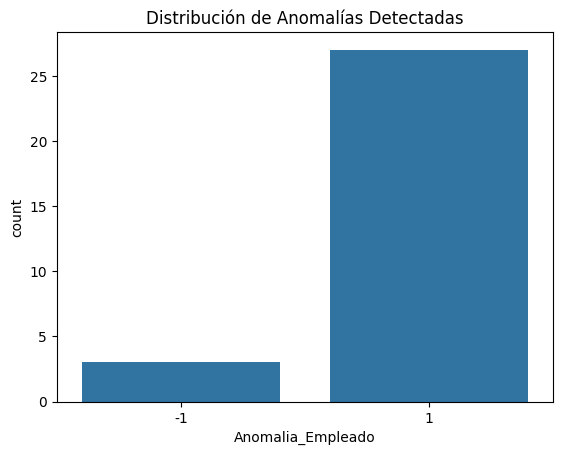

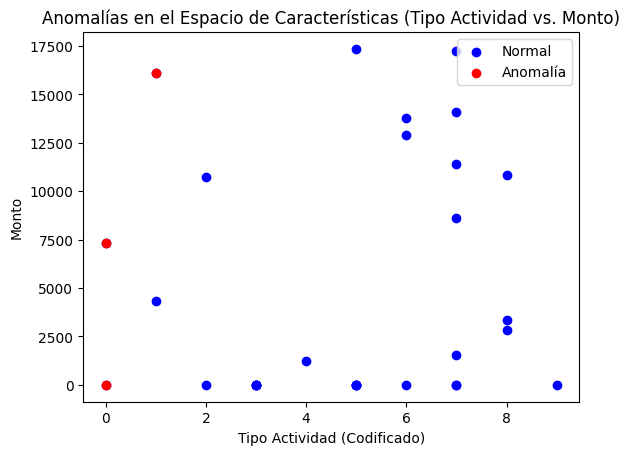


5.2 Análisis de Datos para Identificar Conflictos de Intereses (Ejemplo Conceptual):

No se encontraron transferencias internas de monto alto en este ejemplo.

Solicitudes de Reembolso de Monto Alto:
    ID_Empleado     Monto Departamento       Tipo_Actividad
5           103  14066.22        Legal  Solicitud_Reembolso
6           102   1520.91  Operaciones  Solicitud_Reembolso
18          101  11386.88           TI  Solicitud_Reembolso
25          110   8625.83     Finanzas  Solicitud_Reembolso
29          107  17235.95       Ventas  Solicitud_Reembolso

Frecuencia de Reembolsos por Empleado:
ID_Empleado
103    1
102    1
101    1
110    1
107    1
Name: count, dtype: int64

5.3 Monitoreo de Comunicaciones y Registros (Ejemplo Conceptual):

Frecuencia de Actividades por Empleado:
    ID_Empleado         Tipo_Actividad  Conteo
24          110       Creacion_Usuario       1
25          110     Modificacion_Datos       1
26          110    Solicitud_Reembolso       1
20          109     

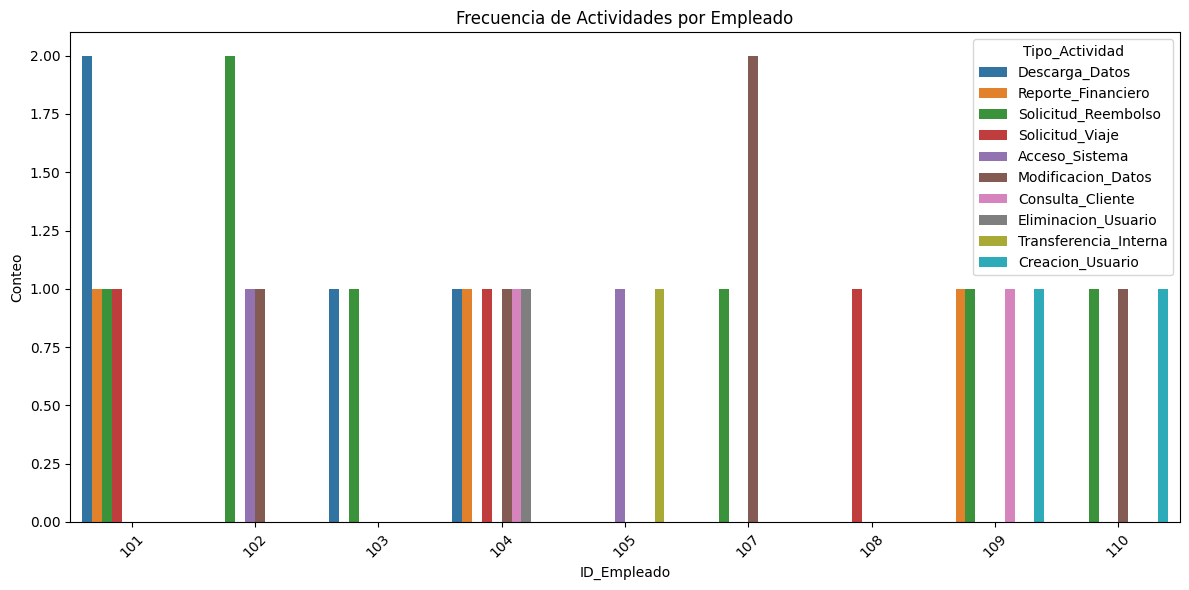

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar un dataset simulado para fraude interno
import pandas as pd
import os

# 1. Definir el nombre del archivo generado localmente
nombre_archivo = 'df_interno.csv'

# 2. Intentar la carga desde el almacenamiento local de Colab
try:
    if os.path.exists(nombre_archivo):
        df_interno = pd.read_csv(nombre_archivo)
        # Aseguramos que la fecha se cargue correctamente
        df_interno['Fecha_Hora'] = pd.to_datetime(df_interno['Fecha_Hora'])

        print(f"✅ Archivo local '{nombre_archivo}' cargado exitosamente.")
        print(f"Total de registros internos: {len(df_interno)}")
    else:
        # Si el archivo local no existe, intenta cargarlo desde el repositorio remoto
        print(f"⚠️ El archivo local no se encontró. Cargando desde GitHub...")
        url = "https://raw.githubusercontent.com/Viny2030/Libro_Algoritmos_contra_fraude_corrupcion/refs/heads/main/df_interno.csv"
        df_interno = pd.read_csv(url)
        df_interno['Fecha_Hora'] = pd.to_datetime(df_interno['Fecha_Hora'])
        print(f"✅ Archivo remoto cargado desde GitHub.")

except Exception as e:
    print(f"❌ Error al cargar los datos: {e}")

# 3. Mostrar las primeras filas
if 'df_interno' in locals():
    display(df_interno.head())

# 5.1 Detección de Actividades Sospechosas de Empleados
print("\n5.1 Detección de Actividades Sospechosas de Empleados (Ejemplo con Isolation Forest):")
if 'Tipo_Actividad' in df_interno.columns and 'Monto' in df_interno.columns and 'ID_Empleado' in df_interno.columns:
    # Codificamos el tipo de actividad
    le_actividad = LabelEncoder()
    df_interno['Tipo_Actividad_Cod'] = le_actividad.fit_transform(df_interno['Tipo_Actividad'])

    # Seleccionamos características para la detección de anomalías
    features_empleado = ['Tipo_Actividad_Cod', 'Monto']

    # Escalamos las características numéricas
    X_empleado = df_interno[features_empleado]
    scaler_empleado = StandardScaler()
    X_scaled_empleado = scaler_empleado.fit_transform(X_empleado)

    # Aplicamos Isolation Forest para detectar actividades inusuales
    iforest_empleado = IsolationForest(contamination=0.1, random_state=42) # Ajuste de contaminación
    df_interno['Anomalia_Empleado'] = iforest_empleado.fit_predict(X_scaled_empleado) # -1: Anómalo, 1: Normal

    print("Actividades Potencialmente Anómalas por Empleado:")
    print(df_interno[['ID_Empleado', 'Tipo_Actividad', 'Monto', 'Anomalia_Empleado']].head(10))

    # Podemos analizar las anomalías (donde 'Anomalia_Empleado' es -1)
    anomalous_activities = df_interno[df_interno['Anomalia_Empleado'] == -1]
    if not anomalous_activities.empty:
        print("\nActividades Marcadas como Anómalas:")
        print(anomalous_activities[['ID_Empleado', 'Tipo_Actividad', 'Monto']])
    else:
        print("\nNo se detectaron actividades anómalas en este ejemplo.")

    # Visualización de la distribución de anomalías
    sns.countplot(x='Anomalia_Empleado', data=df_interno)
    plt.title('Distribución de Anomalías Detectadas')
    plt.show()

    # Visualización de anomalías en el espacio de características
    anomalies = df_interno[df_interno['Anomalia_Empleado'] == -1]
    plt.scatter(df_interno['Tipo_Actividad_Cod'], df_interno['Monto'], color='blue', label='Normal')
    plt.scatter(anomalies['Tipo_Actividad_Cod'], anomalies['Monto'], color='red', label='Anomalía')
    plt.title('Anomalías en el Espacio de Características (Tipo Actividad vs. Monto)')
    plt.xlabel('Tipo Actividad (Codificado)')
    plt.ylabel('Monto')
    plt.legend()
    plt.show()

else:
    print("\nNo se pueden realizar análisis para 5.1 porque faltan columnas necesarias.")

# 5.2 Análisis de Datos para Identificar Conflictos de Intereses (Ejemplo Conceptual)
print("\n5.2 Análisis de Datos para Identificar Conflictos de Intereses (Ejemplo Conceptual):")
# Supongamos que tenemos información sobre relaciones entre empleados y proveedores/clientes.

# Ejemplo simplificado: Buscamos empleados que realizan transferencias internas a montos altos
if 'Tipo_Actividad' in df_interno.columns and 'Monto' in df_interno.columns and 'Departamento' in df_interno.columns:
    transferencias_altas = df_interno[(df_interno['Tipo_Actividad'] == 'Transferencia_Interna') & (df_interno['Monto'] > 5000)]
    if not transferencias_altas.empty:
        print("\nTransferencias Internas de Monto Alto:")
        print(transferencias_altas[['ID_Empleado', 'Monto', 'Departamento', 'Tipo_Actividad']])

        # Análisis de patrones de transferencia
        transferencias_por_departamento = transferencias_altas.groupby('Departamento').size()
        print("\nTransferencias Altas por Departamento:")
        print(transferencias_por_departamento)

    else:
        print("\nNo se encontraron transferencias internas de monto alto en este ejemplo.")

    # Otro ejemplo: Empleados que solicitan reembolsos frecuentes o de montos altos
    reembolsos_altos = df_interno[(df_interno['Tipo_Actividad'] == 'Solicitud_Reembolso') & (df_interno['Monto'] > 1000)]
    if not reembolsos_altos.empty:
        print("\nSolicitudes de Reembolso de Monto Alto:")
        print(reembolsos_altos[['ID_Empleado', 'Monto', 'Departamento', 'Tipo_Actividad']])

        # Frecuencia de reembolsos por empleado
        frecuencia_reembolsos = reembolsos_altos['ID_Empleado'].value_counts()
        print("\nFrecuencia de Reembolsos por Empleado:")
        print(frecuencia_reembolsos)

    else:
        print("\nNo se encontraron solicitudes de reembolso de monto alto en este ejemplo.")
else:
    print("\nNo se pueden realizar análisis conceptual para 5.2 porque faltan columnas necesarias.")

# 5.3 Monitoreo de Comunicaciones y Registros (Ejemplo Conceptual)
print("\n5.3 Monitoreo de Comunicaciones y Registros (Ejemplo Conceptual):")
# En un escenario real, se analizarían correos electrónicos, chats, logs de acceso, etc.

# Ejemplo simplificado: Contar la frecuencia de ciertos tipos de actividades por empleado
if 'ID_Empleado' in df_interno.columns and 'Tipo_Actividad' in df_interno.columns:
    frecuencia_actividades = df_interno.groupby(['ID_Empleado', 'Tipo_Actividad']).size().reset_index(name='Conteo')
    print("\nFrecuencia de Actividades por Empleado:")
    print(frecuencia_actividades.sort_values(by=['ID_Empleado', 'Conteo'], ascending=False))

    # Podríamos buscar patrones inusuales, como un empleado que accede a muchos sistemas
    # o realiza muchos intentos de transferencia.

    # Ejemplo: Identificar empleados con más de 3 accesos al sistema
    accesos_frecuentes = frecuencia_actividades[(frecuencia_actividades['Tipo_Actividad'] == 'Acceso_Sistema') & (frecuencia_actividades['Conteo'] > 3)]
    if not accesos_frecuentes.empty:
        print("\nEmpleados con Frecuentes Accesos al Sistema:")
        print(accesos_frecuentes[['ID_Empleado', 'Conteo']])
    else:
        print("\nNo se encontraron empleados con accesos al sistema muy frecuentes en este ejemplo.")

    # Ejemplo de visualización de la frecuencia de actividades por empleado
    plt.figure(figsize=(12, 6))
    sns.barplot(x='ID_Empleado', y='Conteo', hue='Tipo_Actividad', data=frecuencia_actividades)
    plt.title('Frecuencia de Actividades por Empleado')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("\nNo se puede realizar análisis conceptual para 5.3 porque faltan columnas necesarias.")